In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
######## PART TWO ############
# Trousers are 1, Dresses are 0

In [12]:
xc_train = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_trouser_dress\\troudress_train_x.csv", delimiter=',', skiprows=1)
xc_test = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_trouser_dress\\troudress_test_x.csv", delimiter=',', skiprows=1)
yc_train = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_trouser_dress\\troudress_train_y.csv", delimiter=',', skiprows=1)

In [13]:
print('XC-TRAIN', xc_train.shape)
print('XC_TeST', xc_test.shape)
print('YC_Train', yc_train.shape)

XC-TRAIN (12000, 784)
XC_TeST (2000, 784)
YC_Train (12000,)


In [14]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [15]:
###inspect some of the images###

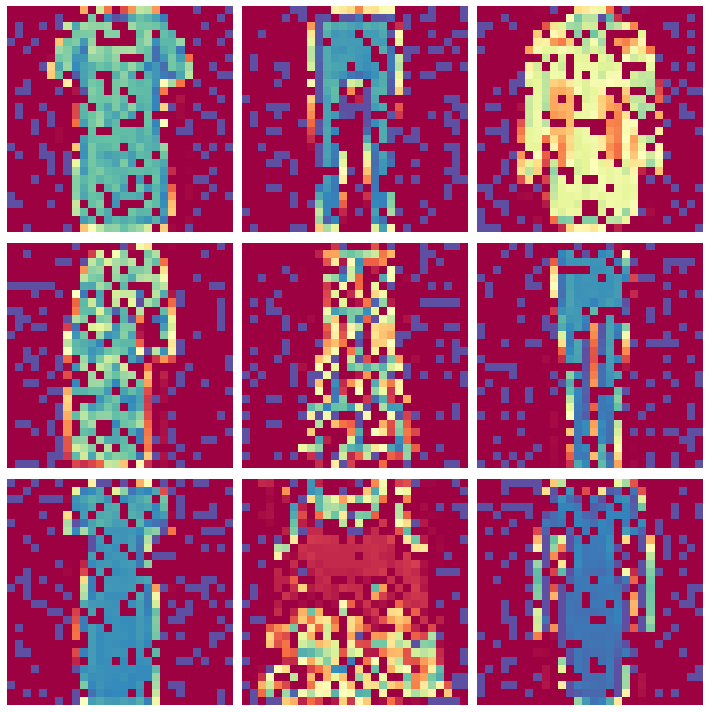

In [16]:
fig = plt.figure(figsize=(10,10))
rows = 3
cols = 3

for i in range(1,10):
    fig.add_subplot(rows,cols,i)
    plt.imshow(xc_train[(7200+i)].reshape(28,28), cmap='Spectral')
    plt.axis('off')
plt.tight_layout()

In [17]:
sum(yc_train)/len(yc_train) #50% trousers and 50% dresses

0.5

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca_model = PCA(n_components=784)

In [20]:
pca_model.fit(xc_train, yc_train)

PCA(n_components=784)

In [21]:
pca_model.transform(xc_train)

array([[ 3.80037911, -0.50571088,  0.53710516, ...,  0.10071405,
         0.15718345,  0.25272797],
       [ 1.77305063,  0.78755025, -1.4819616 , ...,  0.31555089,
        -0.21286841, -0.53900731],
       [ 2.41101347,  0.31629678,  0.9722296 , ...,  0.21820627,
         0.18030882,  0.18049594],
       ...,
       [-0.2720874 ,  1.77215049, -0.78511841, ...,  0.22353759,
         0.0767068 ,  0.01524965],
       [-0.62603876, -0.57635433, -1.10593624, ...,  0.01612663,
        -0.06865951,  0.02552224],
       [-0.42847558, -0.58918198, -2.08635891, ...,  0.06316742,
         0.22465036, -0.32693542]])

In [22]:
comp_count = np.arange(1,785)

In [23]:
pca_model.explained_variance_ratio_

array([0.03666181, 0.01724605, 0.01269907, 0.00685751, 0.00547662,
       0.00462862, 0.00373246, 0.003453  , 0.00294634, 0.00278624,
       0.00275503, 0.00263012, 0.00251949, 0.00241126, 0.00238719,
       0.00221996, 0.00215878, 0.00211562, 0.00207739, 0.00203649,
       0.00203117, 0.00199658, 0.00198213, 0.0019725 , 0.00196618,
       0.00195455, 0.00194971, 0.00194015, 0.00193234, 0.00192921,
       0.00192303, 0.00191954, 0.00191628, 0.00191199, 0.0019048 ,
       0.00189962, 0.00189881, 0.00189384, 0.0018912 , 0.00188646,
       0.00188385, 0.00187567, 0.00187114, 0.00187069, 0.00186445,
       0.00186359, 0.00185588, 0.00185308, 0.00184808, 0.00184473,
       0.0018389 , 0.00183611, 0.00183135, 0.00182995, 0.00182843,
       0.00182738, 0.00181973, 0.00181751, 0.00181326, 0.00181099,
       0.00181003, 0.00180355, 0.00180119, 0.00179744, 0.00179489,
       0.00179228, 0.00178884, 0.00178726, 0.00178511, 0.00178276,
       0.00178005, 0.00177544, 0.00177468, 0.0017706 , 0.00176

In [24]:
var_explained = list()
for i in range(1,len(comp_count)+1):
    var = sum(pca_model.explained_variance_ratio_[0:i])
    var_explained.append(var)
var_explained = np.array(var_explained)

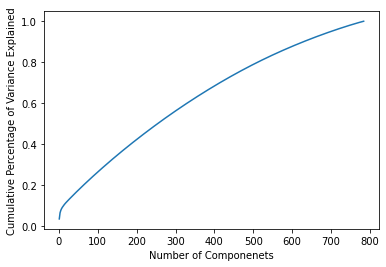

In [25]:
sns.lineplot(x=comp_count, y=var_explained)
plt.ylabel('Cumulative Percentage of Variance Explained')
plt.xlabel('Number of Componenets')
plt.show;

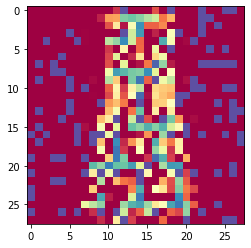

In [26]:
test_row = np.copy(xc_train[7205])
plt.imshow(test_row.reshape(28,28), cmap='Spectral')
plt.show;

In [12]:
def cleanup(test_row):
    for i in range(29,(len(test_row)-29)):
        spots = [(i-29),(i-28),(i-27), (i-1),(i+1), (i+27), (i+28), (i+29)]
        zeros = 0
        nonzeros = 0
        tot = 0
        for j in spots:
            if test_row[j] == 0:
                zeros+=1
                tot += test_row[j]
            else:
                nonzeros += 1
                tot += test_row[j]
        if (i % 28 in range(13,17)) and (i/28 > 15):
            if test_row[i] !=0:
                if zeros >=4:
                    test_row[i] = 0
            elif test_row[i] == 0:
                if nonzeros >= 6:
                    test_row[i] = tot/8

        elif i % 28 in range(8,21):
            if test_row[i] !=0:
                if zeros >=7:
                    test_row[i] = 0
            elif test_row[i] == 0:
                if nonzeros >= 3:
                    test_row[i] = tot/8
            
        else:
            if test_row[i] !=0:
                if zeros >=6:
                    test_row[i] = 0
            elif test_row[i] == 0:
                if nonzeros >= 6:
                    test_row[i] = tot/8
        
#plt.imshow(test_row.reshape(28,28), cmap='Spectral')
#plt.show;

In [28]:
#first split our data so that we have a validation set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [29]:
xc_train, xc_val, yc_train, yc_val = train_test_split(xc_train, yc_train,test_size=.25, random_state=1)

In [30]:
C_grid = np.logspace(-9,6,31)
non_regd_cs = np.array([1000000, 100000000])

In [31]:
base_model = LogisticRegressionCV(solver='liblinear', random_state=1, Cs=non_regd_cs, max_iter=500)

In [32]:
base_model.fit(xc_train, yc_train)
base_base_preds = base_model.predict(xc_val)
base_acc = base_model.score(xc_val,yc_val)
base_ll = log_loss(yc_val, base_base_preds)
print(base_acc)
print(base_ll)

0.9263333333333333
2.544389577785536


In [33]:
#Doubling our data

In [34]:
xc_train = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_trouser_dress\\troudress_train_x.csv", delimiter=',', skiprows=1)
xc_test = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_trouser_dress\\troudress_test_x.csv", delimiter=',', skiprows=1)
yc_train = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_trouser_dress\\troudress_train_y.csv", delimiter=',', skiprows=1)

In [35]:
flip_train = np.ones(len(xc_train)*len(xc_train[0])).reshape(len(xc_train),len(xc_train[0]))

In [36]:
for big_row in range(0, len(xc_train)):
    row_mat = np.copy(xc_train[big_row].reshape(28,28))

    for row in range(0,len(row_mat)):
        row_mat[row] = row_mat[row][::-1]
    
    flip_row = row_mat.reshape(1,784)
    flip_train[big_row] = flip_row


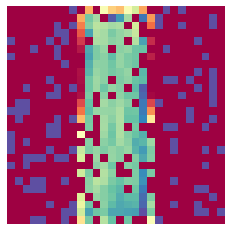

In [37]:
plt.imshow(xc_train[11999].reshape(28,28), cmap='Spectral')
plt.axis('off')
plt.show;

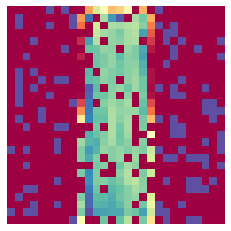

In [38]:
plt.imshow(flip_train[11999].reshape(28,28), cmap='Spectral')
plt.axis('off')
plt.show;



In [39]:
#Combining the data

xc_train = np.vstack((xc_train,flip_train))
yc_train = np.hstack((yc_train,yc_train))

In [40]:
print(xc_train.shape)
print(yc_train.shape)

(24000, 784)
(24000,)


In [41]:
#### Building our model on non-transformed data

In [42]:
xc_train, xc_val, yc_train, yc_val = train_test_split(xc_train, yc_train,test_size=.25, random_state=1)

In [43]:
base_model = LogisticRegressionCV(solver='liblinear', random_state=1, Cs=non_regd_cs)

In [44]:
base_model.fit(xc_train, yc_train)
base_base_preds = base_model.predict(xc_val)
base_acc = base_model.score(xc_val,yc_val)
base_ll = log_loss(yc_val, base_base_preds)
print(base_acc)
print(base_ll)


0.9391666666666667
2.1011312860851126


In [45]:
#So we get some improvement by doubling the data!

In [46]:
#Now we test regularized models

In [47]:
base_c_reg_mod_lasso = LogisticRegressionCV(solver='liblinear', penalty='l1', Cs=C_grid, random_state = 1, max_iter=200)
base_c_reg_mod_lasso.fit(xc_train, yc_train)
base_c_preds = base_c_reg_mod_lasso.predict(xc_train)


In [48]:
acc = base_c_reg_mod_lasso.score(xc_train,yc_train)
cll = log_loss(yc_train, base_c_preds)
print(acc)
print(cll)

base_c_reg_mod_lasso.C_


0.9544444444444444
1.5734476284771675


array([0.1])

In [49]:

base_c_reg_mod_ridge = LogisticRegressionCV(solver='liblinear', penalty='l2', Cs=C_grid, random_state = 1, max_iter=200)
base_c_reg_mod_ridge.fit(xc_train, yc_train)
base_c_preds = base_c_reg_mod_ridge.predict(xc_val)

  

In [50]:

acc_ridge = base_c_reg_mod_ridge.score(xc_val, yc_val)
cll_ridge = log_loss(yc_val, base_c_preds)

print(acc_ridge)
print(cll_ridge)
base_c_reg_mod_ridge.C_


0.949
1.7614938546215266


array([0.00316228])

In [51]:
#We will go with l1 penalty since results are slightly better and we want to eliminate features (the features on the edges shouldn't matter)

In [52]:
#Testing thresholds

In [53]:
base_c_pred_probs = base_c_reg_mod_lasso.predict_proba(xc_val)[:,1]

In [54]:
thresholds = np.arange(0,105,5)/100
print(thresholds)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [55]:
accuracy_list = list()
for thresh in thresholds:
    preds = list()
    for prob in base_c_pred_probs:
        if prob >= thresh:
            preds.append(1)
        else:
            preds.append(0)
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for i in range(0,len(yc_val)):
        if yc_val[i] == 1:
            if preds[i] == 1:
                TP += 1
            else:
                FN += 1
        else:
            if preds[i] == 0:
                TN += 1
            else:
                FP += 1

    acc = (TP+TN)/(len(yc_val))
    accuracy_list.append(acc)

In [56]:
print(accuracy_list)
print(max(accuracy_list))
#print(len(accuracy_list))
#print(len(thresholds))
thresholds[np.argmax(accuracy_list)]

[0.49966666666666665, 0.8006666666666666, 0.8623333333333333, 0.8931666666666667, 0.9156666666666666, 0.9286666666666666, 0.9361666666666667, 0.9418333333333333, 0.9455, 0.9478333333333333, 0.9491666666666667, 0.948, 0.9466666666666667, 0.9448333333333333, 0.9406666666666667, 0.9355, 0.9305, 0.918, 0.9001666666666667, 0.8658333333333333, 0.5003333333333333]
0.9491666666666667


0.5

In [57]:
#.5 is our best threshold

In [58]:
fpr, tpr, threshs = roc_curve(yc_val, base_c_pred_probs)
roc_auc_score(yc_val, base_c_pred_probs)

0.9819519919786629

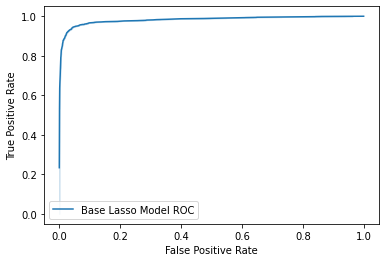

In [59]:
sns.lineplot(x=fpr, y=tpr, estimator=np.max)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(labels=['Base Lasso Model ROC'])
plt.show;

In [60]:
#The key distinction between trousers and dresses is the gap between the legs in pants

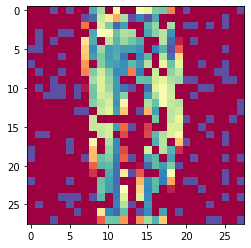

In [61]:
plt.imshow(xc_train[7249].reshape(28,28), cmap='Spectral')
plt.imshow(xc_train[7206].reshape(28,28), cmap='Spectral')
plt.show;

In [62]:
#This gap is occuring somewhere in the middle of the X axis and the bottom half of the y axis

#We create three zones across the data -> 1. "left leg" 2. "gap" 3. "right leg"  

#Right leg is  % 28 in 16, 17 ,18 ; Gap is 13,14,15, left leg is 10,11,12

#exclude zeros for right leg and left leg. calculate min val in each zone. new feat is the sum of the (avg(left min, right min) - gap min)

#Read in the data again to apply the transformations, then build the model

In [63]:
#put our data back together again

In [64]:
xc_train = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_trouser_dress\\troudress_train_x.csv", delimiter=',', skiprows=1)
xc_test = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_trouser_dress\\troudress_test_x.csv", delimiter=',', skiprows=1)
yc_train = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_trouser_dress\\troudress_train_y.csv", delimiter=',', skiprows=1)

In [65]:
flip_train = np.ones(len(xc_train)*len(xc_train[0])).reshape(len(xc_train),len(xc_train[0]))
for big_row in range(0, len(xc_train)):
    row_mat = np.copy(xc_train[big_row].reshape(28,28))

    for row in range(0,len(row_mat)):
        row_mat[row] = row_mat[row][::-1]
    
    flip_row = row_mat.reshape(1,784)
    flip_train[big_row] = flip_row
xc_train = np.vstack((xc_train,flip_train))
yc_train = np.hstack((yc_train,yc_train))

In [66]:
trouser_inds = np.where(yc_train == 1)[0]
dress_inds = np.where(yc_train == 0)[0]

In [67]:
xc_copy = np.copy(xc_train)
yc_copy = np.copy(yc_train)

In [68]:
x_axis = np.arange(0,28)
print(x_axis)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


In [69]:
avg_trous_vals = np.zeros(28)
for row in trouser_inds:

    row_mat = np.copy(xc_train[row]).reshape(28,28)

    avg_trous_vals_indiv = np.zeros(28)

    for j in range(10,28):

        for i in range(0,28):
            indic = i % 28

            avg_trous_vals_indiv[indic] += row_mat[j][i]
    avg_trous_vals_indiv = avg_trous_vals_indiv/18
    avg_trous_vals += avg_trous_vals_indiv

avg_trous_vals = avg_trous_vals/12000


In [70]:
avg_dress_vals = np.zeros(28)
for row in dress_inds:

    row_mat = np.copy(xc_train[row]).reshape(28,28)

    avg_dress_vals_indiv = np.zeros(28)

    for j in range(10,28):

        for i in range(0,28):
            indic = i % 28

            avg_dress_vals_indiv[indic] += row_mat[j][i]
    avg_dress_vals_indiv = avg_dress_vals_indiv/18
    avg_dress_vals += avg_dress_vals_indiv

avg_dress_vals = avg_dress_vals/12000


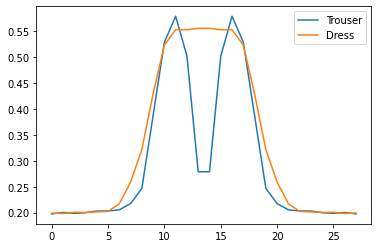

In [71]:
#This is the plot of the average value at each column 
sns.lineplot(x=x_axis, y=avg_trous_vals)
sns.lineplot(x=x_axis, y=avg_dress_vals)
plt.legend(labels=['Trouser', 'Dress'])
plt.show;

In [72]:
#We should look at these plots for false positives and false negatives

In [73]:
preds_full_data = base_c_reg_mod_lasso.predict(xc_train)

In [74]:
preds_full_data.shape

(24000,)

In [75]:
false_pos_inds = list()
false_neg_inds = list()

for i in range(0,len(preds_full_data)):
    if (preds_full_data[i] == 1) and (yc_train[i] == 0):
        false_pos_inds.append(i)
    elif (preds_full_data[i] == 0) and (yc_train[i] == 1):
        false_neg_inds.append(i)
    else:
        pass


In [76]:
avg_fp_vals = np.zeros(28)
for row in false_pos_inds:

    row_mat = np.copy(xc_train[row]).reshape(28,28)

    avg_fp_vals_indiv = np.zeros(28)

    for j in range(10,28):

        for i in range(0,28):
            indic = i % 28

            avg_fp_vals_indiv[indic] += row_mat[j][i]
    avg_fp_vals_indiv = avg_fp_vals_indiv/18
    avg_fp_vals += avg_fp_vals_indiv

avg_fp_vals = avg_fp_vals/len(false_pos_inds)


In [77]:
avg_fn_vals = np.zeros(28)
for row in false_neg_inds:

    row_mat = np.copy(xc_train[row]).reshape(28,28)

    avg_fn_vals_indiv = np.zeros(28)

    for j in range(10,28):

        for i in range(0,28):
            indic = i % 28

            avg_fn_vals_indiv[indic] += row_mat[j][i]
    avg_fn_vals_indiv = avg_fn_vals_indiv/18
    avg_fn_vals += avg_fn_vals_indiv

avg_fn_vals = avg_fn_vals/len(false_neg_inds)


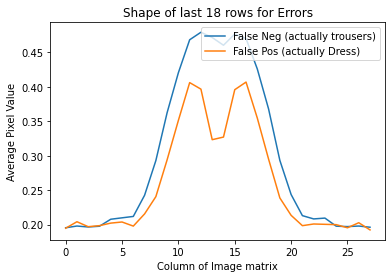

In [78]:
#This is the plot of the average value at each column 
sns.lineplot(x=x_axis, y=avg_fn_vals)
sns.lineplot(x=x_axis, y=avg_fp_vals)
plt.ylabel('Average Pixel Value')
plt.xlabel('Column of Image matrix')
plt.title('Shape of last 18 rows for Errors')
plt.legend(labels=['False Neg (actually trousers)','False Pos (actually Dress)'])
plt.show;

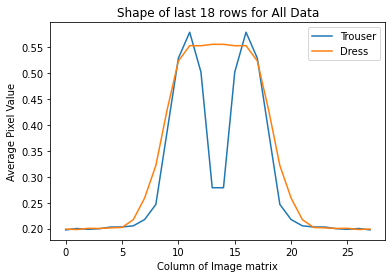

In [79]:
#This is the plot of the average value at each column 
sns.lineplot(x=x_axis, y=avg_trous_vals)
sns.lineplot(x=x_axis, y=avg_dress_vals)
plt.ylabel('Average Pixel Value')
plt.xlabel('Column of Image matrix')
plt.title('Shape of last 18 rows for All Data')
plt.legend(labels=['Trouser', 'Dress'])
plt.show;

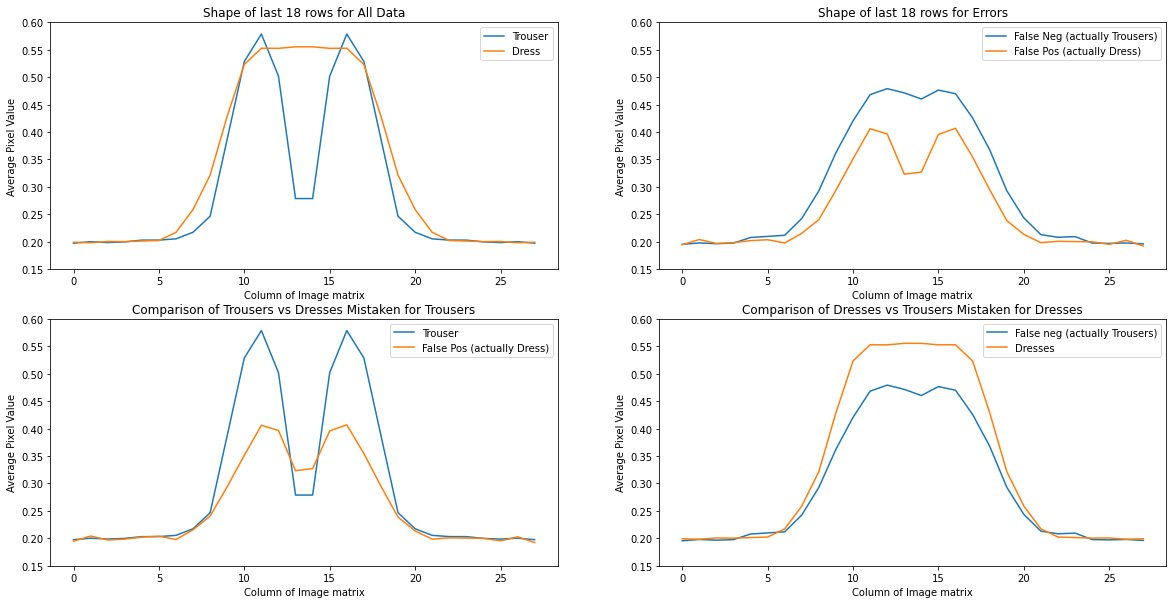

In [80]:
fig = plt.figure(figsize=(20,10))
rows = 2
cols = 2

fig.add_subplot(rows,cols,1)
sns.lineplot(x=x_axis, y=avg_trous_vals)
sns.lineplot(x=x_axis, y=avg_dress_vals)
plt.ylabel('Average Pixel Value')
plt.xlabel('Column of Image matrix')
plt.ylim(bottom=.15, top =.60,)
plt.title('Shape of last 18 rows for All Data')
plt.legend(labels=['Trouser', 'Dress'])

fig.add_subplot(rows,cols,2)
sns.lineplot(x=x_axis, y=avg_fn_vals)
sns.lineplot(x=x_axis, y=avg_fp_vals)
plt.ylabel('Average Pixel Value')
plt.xlabel('Column of Image matrix')
plt.ylim(bottom=.15, top =.60,)
plt.title('Shape of last 18 rows for Errors')
plt.legend(labels=['False Neg (actually Trousers)','False Pos (actually Dress)'])


fig.add_subplot(rows,cols,3)
sns.lineplot(x=x_axis, y=avg_trous_vals)
sns.lineplot(x=x_axis, y=avg_fp_vals)
plt.ylabel('Average Pixel Value')
plt.xlabel('Column of Image matrix')
plt.ylim(bottom=.15, top =.60,)
plt.title('Comparison of Trousers vs Dresses Mistaken for Trousers')
plt.legend(labels=['Trouser', 'False Pos (actually Dress)'])

fig.add_subplot(rows,cols,4)
sns.lineplot(x=x_axis, y=avg_fn_vals)
sns.lineplot(x=x_axis, y=avg_dress_vals)
plt.ylabel('Average Pixel Value')
plt.xlabel('Column of Image matrix')
plt.ylim(bottom=.15, top =.60,)
plt.title('Comparison of Dresses vs Trousers Mistaken for Dresses')
plt.legend(labels=['False neg (actually Trousers)','Dresses' ])

plt.show()


In [81]:
#How can we transform features to help the algo see these differences?

In [82]:
#To fix the false negs: if left, gap , right < .5 and abs(avg(left,right)/gap -1) < .05

#To fix the false pos's: if left, gap , right < .45 and abs(avg(left,right)/gap -1) > .05


In [83]:
#create the new features and add to the dataset
#False neg fix will be column 0
#False pos fix will be column 1

In [84]:
new_feats = np.zeros(len(xc_train)*2).reshape(len(xc_train),2) 
left_leg_range = [9,10,11,12]
gap_range = [13,14]
right_leg_range = [15,16,17,18]

for row in range(0,len(xc_train)):
    test_row = np.copy(xc_train[row].reshape(28,28))
    test_vals = np.zeros(28)

    for j in range(10,len(test_row)):
        for i in range(0,28):
            ind = i % 28
            test_vals[ind] += test_row[j][i] #add each row value to its spot in the test val array based on column
    test_vals=test_vals/18   #divide by 18 to get the average of the 18 rows we looked at 

    left_max = 0
    gap_min = 1
    right_max = 0

    for k in range(0,len(test_vals)):
        if k in left_leg_range:
            if test_vals[k] > left_max:
                left_max = test_vals[k]
        elif k in gap_range:
            if test_vals[k] < gap_min:
                gap_min = test_vals[k]
        elif k in right_leg_range:
            if test_vals[k] > right_max:
                right_max = test_vals[k]
        else:
            pass
    
    fn_height_indicator = False
    fn_gap_mag_indicator = False

    if (left_max < .5) and (right_max < .5) and (gap_min < .5):
        fn_height_indicator =True
    
        if abs(((right_max+left_max)/2) -gap_min) < .05:
            fn_gap_mag_indicator = True
    
    if fn_height_indicator and fn_gap_mag_indicator:
        new_feats[row][0] = 1

    fp_height_indicator = False
    fp_gap_mag_indicator = False

    if (left_max < .45) and (right_max < .45) and (gap_min < .45):
        fp_height_indicator =True
    
        if abs(((right_max+left_max)/2)-gap_min) > .05:
            fp_gap_mag_indicator = True
    
    if fp_height_indicator and fp_gap_mag_indicator:
        new_feats[row][1] = 1


In [85]:
xc_f_train = np.hstack((xc_train,new_feats))


In [86]:
print('False Neg flags', sum(new_feats[:,0]))
print('False Pos flags', sum(new_feats[:,1]))

False Neg flags 586.0
False Pos flags 1214.0


In [87]:
xc_f_train, xc_f_val, yc_f_train, yc_f_val = train_test_split(xc_f_train, yc_train, test_size=.25, random_state=1)

In [88]:
base_c_reg_mod_lasso.fit(xc_f_train,yc_f_train)
base_c_reg_mod_lasso.score(xc_f_val,yc_f_val)

0.9495

In [89]:
coef_mat = base_c_reg_mod_lasso.coef_
print(coef_mat[:,784:])

[[-1.37509744 -0.96419142]]


In [90]:
coef_mat = coef_mat[:,0:784].reshape(28,28)
coef_mat[26][13:15]

array([-0.46732767, -0.4993198 ])

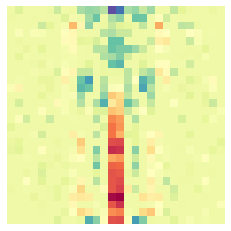

In [91]:
plt.imshow(coef_mat, cmap='Spectral')
plt.axis('off')
plt.show;

In [92]:
f_probas = base_c_reg_mod_lasso.predict_proba(xc_f_val)[:,1]

In [93]:
accuracy_list = list()
for thresh in thresholds:
    preds = list()
    for prob in f_probas:
        if prob >= thresh:
            preds.append(1)
        else:
            preds.append(0)
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for i in range(0,len(yc_f_val)):
        if yc_f_val[i] == 1:
            if preds[i] == 1:
                TP += 1
            else:
                FN += 1
        else:
            if preds[i] == 0:
                TN += 1
            else:
                FP += 1

    acc = (TP+TN)/(len(yc_f_val))
    accuracy_list.append(acc)

    print(max(accuracy_list))
print(np.argmax(accuracy_list))
print(thresholds[np.argmax(accuracy_list)])

0.49966666666666665
0.8063333333333333
0.868
0.8961666666666667
0.9156666666666666
0.9271666666666667
0.9368333333333333
0.9413333333333334
0.9465
0.9488333333333333
0.9495
0.9501666666666667
0.9501666666666667
0.9501666666666667
0.9501666666666667
0.9501666666666667
0.9501666666666667
0.9501666666666667
0.9501666666666667
0.9501666666666667
0.9501666666666667
11
0.55


In [94]:
fprf, tprf, threshf = roc_curve(yc_f_val,f_probas)

In [95]:
roc_auc_score(yc_f_val, f_probas)

0.9829509924226633

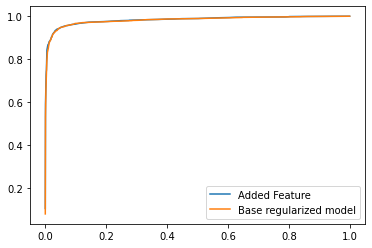

In [96]:
sns.lineplot(x=fprf, y=tprf, ci=None)
sns.lineplot(x=fpr, y=tpr, ci= None)
plt.legend(labels=('Added Feature','Base regularized model'))
plt.show;

In [97]:
calc_confusion_matrix_for_threshold(yc_f_val, f_probas, .55)

Predicted,0,1
True,,
0,2901,101
1,198,2800


In [98]:
calc_confusion_matrix_for_threshold(yc_val, base_c_pred_probs, .5)

Predicted,0,1
True,,
0,2877,125
1,180,2818


In [99]:
#It looks like this feature transformation made things worse

In [100]:
#Trying to clean up the data itself

In [101]:
xc_f_train_clean = np.copy(xc_f_train)
xc_f_val_clean = np.copy(xc_f_val)

In [102]:
for row in xc_f_train_clean:
    cleanup(row)
for row in xc_f_val_clean:
    cleanup(row)

Cleanup of a Trouser image (top) and Dress image (bottom)


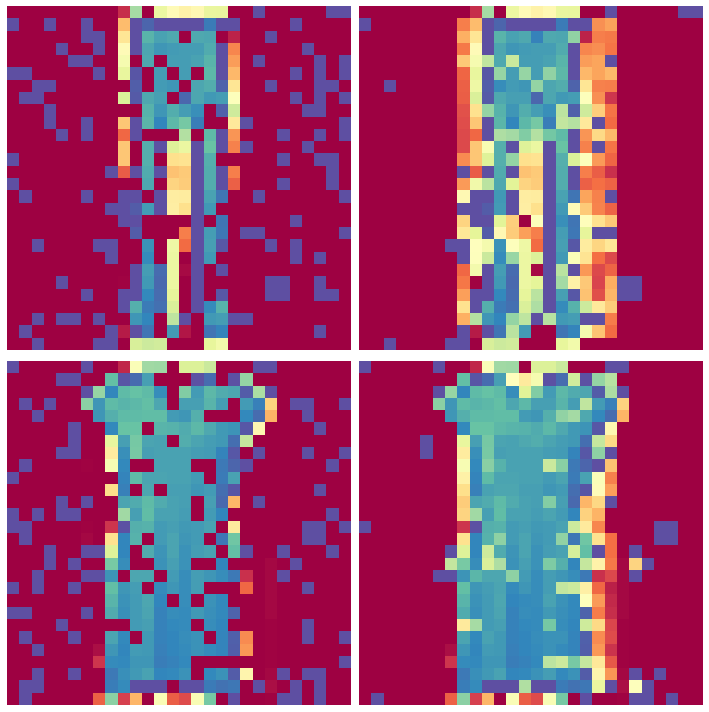

In [103]:
fig = plt.figure(figsize=(10,10))
rows = 2
cols = 2

fig.add_subplot(rows,cols,1)
plt.imshow(xc_f_val[0][0:784].reshape(28,28), cmap='Spectral')
plt.axis('off')


fig.add_subplot(rows,cols,2)
plt.imshow(xc_f_val_clean[0][0:784].reshape(28,28), cmap='Spectral')
plt.axis('off')


fig.add_subplot(rows,cols,3)
plt.imshow(xc_f_val[1][0:784].reshape(28,28), cmap='Spectral')
plt.axis('off')


fig.add_subplot(rows,cols,4)
plt.imshow(xc_f_val_clean[1][0:784].reshape(28,28), cmap='Spectral')
plt.axis('off')

print('Cleanup of a Trouser image (top) and Dress image (bottom)')
plt.tight_layout()
plt.show;






In [104]:
base_c_reg_mod_lasso.fit(xc_f_train_clean,yc_f_train)
base_c_reg_mod_lasso.score(xc_f_val_clean,yc_f_val)

0.9445

In [105]:
f_clean_probas = base_c_reg_mod_lasso.predict_proba(xc_f_val_clean)[:,1]

In [106]:
accuracy_list = list()
for thresh in thresholds:
    preds = list()
    for prob in f_clean_probas:
        if prob >= thresh:
            preds.append(1)
        else:
            preds.append(0)
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for i in range(0,len(yc_f_val)):
        if yc_f_val[i] == 1:
            if preds[i] == 1:
                TP += 1
            else:
                FN += 1
        else:
            if preds[i] == 0:
                TN += 1
            else:
                FP += 1

    acc = (TP+TN)/(len(yc_f_val))
    accuracy_list.append(acc)

print(max(accuracy_list))
print(np.argmax(accuracy_list))
print(thresholds[np.argmax(accuracy_list)])

0.9445
10
0.5


In [107]:
calc_confusion_matrix_for_threshold(yc_f_val, f_clean_probas, .5)

Predicted,0,1
True,,
0,2870,132
1,201,2797


[0.         0.03703704 0.07407407 0.11111111 0.14814815 0.18518519
 0.22222222 0.25925926 0.2962963  0.33333333 0.37037037 0.40740741
 0.44444444 0.48148148 0.51851852 0.55555556 0.59259259 0.62962963
 0.66666667 0.7037037  0.74074074 0.77777778 0.81481481 0.85185185
 0.88888889 0.92592593 0.96296296 1.        ]


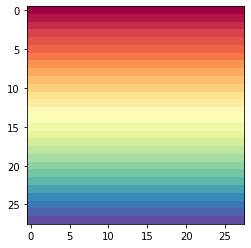

In [108]:
color_map = np.ones(28*28).reshape(28,28)
colors = np.linspace(0,1,28)
for row in range(0,len(color_map)):
    color_map[row]=color_map[row] * colors[row]

plt.imshow(color_map, cmap='Spectral')
plt.show;

print(colors)

In [109]:
#Final model to f with

In [110]:
xc_train = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_trouser_dress\\troudress_train_x.csv", delimiter=',', skiprows=1)
xc_test = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_trouser_dress\\troudress_test_x.csv", delimiter=',', skiprows=1)
yc_train = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_trouser_dress\\troudress_train_y.csv", delimiter=',', skiprows=1)

In [111]:
for big_row in range(0, len(xc_train)):
    row_mat = np.copy(xc_train[big_row].reshape(28,28))

    for row in range(0,len(row_mat)):
        row_mat[row] = row_mat[row][::-1]
    
    flip_row = row_mat.reshape(1,784)
    flip_train[big_row] = flip_row
xc_train = np.vstack((xc_train,flip_train))
yc_train = np.hstack((yc_train,yc_train))

In [124]:
base_c_reg_mod_lasso = LogisticRegressionCV(solver='liblinear', penalty='l1', Cs=C_grid, cv=10,random_state = 1, max_iter=200)
base_c_reg_mod_lasso.fit(xc_train, yc_train)
base_c_preds = base_c_reg_mod_lasso.predict(xc_train)

In [126]:
acc = base_c_reg_mod_lasso.score(xc_train,yc_train)
cll = log_loss(yc_train, base_c_preds)
print(acc)
print(cll)

0.9532916666666666
1.6132635732810914


In [127]:
final_pred_probas = base_c_reg_mod_lasso.predict_proba(xc_train)[:,1]

In [128]:
accuracy_list = list()
for thresh in thresholds:
    preds = list()
    for prob in final_pred_probas:
        if prob >= thresh:
            preds.append(1)
        else:
            preds.append(0)
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for i in range(0,len(yc_train)):
        if yc_train[i] == 1:
            if preds[i] == 1:
                TP += 1
            else:
                FN += 1
        else:
            if preds[i] == 0:
                TN += 1
            else:
                FP += 1

    acc = (TP+TN)/(len(yc_train))
    accuracy_list.append(acc)

In [129]:
print(accuracy_list)
print(max(accuracy_list))
#print(len(accuracy_list))
#print(len(thresholds))
thresholds[np.argmax(accuracy_list)]

[0.5, 0.8161666666666667, 0.8789166666666667, 0.9077916666666667, 0.9246666666666666, 0.936, 0.94325, 0.9504166666666667, 0.9517916666666667, 0.9535, 0.9532916666666666, 0.95325, 0.9534583333333333, 0.9500416666666667, 0.9461666666666667, 0.9400416666666667, 0.9332916666666666, 0.9222083333333333, 0.9031666666666667, 0.8692083333333334, 0.5]
0.9535


0.45

In [117]:
test_pred_probas = base_c_reg_mod_lasso.predict_proba(xc_test)[:,1]

In [118]:
test_preds = list()
for prob in test_pred_probas:
    if prob >= 0.45:
        test_preds.append(1)
    else:
        test_preds.append(0)

In [119]:
print(len(xc_test))
len(test_preds)

2000


2000

In [120]:
yproba1_test = base_c_reg_mod_lasso.predict_proba(xc_test)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test)

In [121]:
len(yproba1_test)

2000

In [123]:
1-.058

0.942

In [130]:
xc_test_clean = np.copy(xc_test)
for row in xc_test_clean:
    cleanup(row)
    

In [133]:
yproba1_test = base_c_reg_mod_lasso.predict_proba(xc_test_clean)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test)

In [37]:
xc_train = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_trouser_dress\\troudress_train_x.csv", delimiter=',', skiprows=1)
xc_test = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_trouser_dress\\troudress_test_x.csv", delimiter=',', skiprows=1)
yc_train = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_trouser_dress\\troudress_train_y.csv", delimiter=',', skiprows=1)

In [38]:
import tensorflow as tf

In [39]:
flip_train = np.ones(len(xc_train)*len(xc_train[0])).reshape(len(xc_train),len(xc_train[0]))

In [40]:
for big_row in range(0, len(xc_train)):
    row_mat = np.copy(xc_train[big_row].reshape(28,28))

    for row in range(0,len(row_mat)):
        row_mat[row] = row_mat[row][::-1]
    
    flip_row = row_mat.reshape(1,784)
    flip_train[big_row] = flip_row


In [41]:
#Combining the data

xc_train = np.vstack((xc_train,flip_train))
yc_train = np.hstack((yc_train,yc_train))

In [48]:
xc_train[0].shape

(784,)

In [51]:
from scipy import ndimage
xc_blur.shape

(24000, 784)

In [52]:
xc_blur = np.copy(xc_train)
for i in range(0,len(xc_blur)):
    cleanup(xc_blur[i])
    xc_blur[i] = xc_blur[i].reshape(28,28)
    xc_blur[i] = ndimage.gaussian_filter(xc_blur[i],1)
    xc_blur[i] = xc_blur[i].reshape(784)



In [53]:
xc_blur = xc_blur.reshape(24000,28,28)

In [54]:
for i in range(0,len(xc_blur)):
    xc_blur[i] = ndimage.gaussian_filter(xc_blur[i],1)

xc_blur = xc_blur.reshape(24000,784)


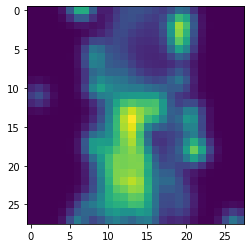

In [60]:
plt.imshow(xc_blur[142].reshape(28,28))

In [63]:
C_grid = np.logspace(-5,3,16)

In [65]:
from sklearn.linear_model import LogisticRegressionCV

In [66]:
lasso_blur_mod = LogisticRegressionCV(solver='liblinear', penalty='l1', Cs=C_grid, random_state = 1, max_iter=200)

In [67]:
lasso_blur_mod.fit(xc_blur, yc_train)

In [ ]:
lasso_blur_mod.score(xc_blur,yc_train)